In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import schur, eigvals

# Theory for rho, f1, f2 fields

We get the hierarchies
$$
	\partial_t f_{k,S} =
	-\frac{1}{2} \nabla^* (v_S f_{k+1,S})
	- \frac{1}{2} \nabla(v_S f_{k-1,S})
	+ D_t \Delta f_{k,S}
	- D_r k^2 f_{k,S}.
$$

Truncating it at order $\epsilon^4$, we get equations for $\rho_S$, $f_{1,S}$, $f_{2,S}$ and $f_{3,S}$:
$$
\begin{aligned}
	\partial_t \rho_S &= -\Re [\nabla^* (v_S f_{1,S})]  + D_t \Delta \rho_S\\
	\partial_t f_{1,S} &= -\frac{1}{2} \nabla^* (v_S f_{2,S}) - \frac{1}{2}\nabla(v_S\rho_S)
	- D_r f_{1,S} +  D_t \Delta f_{1,S},\\
	\partial_t f_{2,S} &= -\frac{1}{2} \nabla^* (v_S f_{3,S}) - \frac{1}{2}\nabla(v_S f_{1,S}) - 4 D_r f_{2,S} + D_t \Delta f_{2,S}, \\
	\partial_t f_{3,S} &= -\frac{1}{2} \nabla(v_S f_{2, S}) - 9 D_r f_{3,S}.
\end{aligned}
$$

By letting $\partial_t f_{3,S}=0$, we get $f_{3,S}=-\frac{1}{18D_r}\nabla(v_Sf_{2,S})$, then the equation for $\rho$, $f_{1,S}$ and $f_{2,S}$ reads
$$
\begin{aligned}
    \partial_t \rho_S &= -\Re [\nabla^* (v_S f_{1,S})]  + D_t \Delta \rho_S\\
    \partial_t f_{1,S} &= -\frac{1}{2} \nabla^* (v_S f_{2,S}) - \frac{1}{2}\nabla(v_S\rho_S)
    - D_r f_{1,S} +  D_t \Delta f_{1,S},\\
    \partial_t f_{2,S} &= \frac{1}{36 D_r} \nabla^* (v_S \nabla(v_S f_{2,S})) - \frac{1}{2}\nabla(v_S f_{1,S}) - 4 D_r f_{2,S} + D_t \Delta f_{2,S}.
\end{aligned}
$$

Neclecting the subfix $S$, 
$$
\begin{aligned}
\partial_t \rho &= -(\partial_x (v p_x) + \partial_y (v p_y)), \\
\partial_t p_x&= -\frac{1}{2}(\partial_x(vQ_{xx})+\partial_y(vQ_{xy})) -\frac{1}{2}\partial_x(v\rho) - D_r p_x,\\
\partial_t p_y&= -\frac{1}{2}(\partial_x(vQ_{xy})-\partial_y(vQ_{xx})) -\frac{1}{2}\partial_y(v\rho) - D_r p_y, \\
\partial_t Q_{xx}&\approx \frac{1}{36D_r} v(\partial^2_x+\partial^2_y)(vQ_{xx})-\frac{1}{2}(\partial_x(vp_x)-\partial_y(vp_y)) - 4D_r Q_{xx},\\
\partial_t Q_{xy}&\approx \frac{1}{36D_r} v(\partial^2_x+\partial^2_y)(vQ_{xy})-\frac{1}{2}(\partial_x(vp_y)+\partial_y(vp_x)) - 4D_r Q_{xy}.
\end{aligned}
$$

Linear expansion:
$$
\begin{aligned}
\partial_t \delta\rho &= -v_0(\partial_x p_x + \partial_y p_y), \\
\partial_t p_x&= -\frac{v_0}{2}(\partial_x Q_{xx}+\partial_y Q_{xy}) -\frac{1}{2}(v_0\partial_x \delta\rho+\rho_0\partial_x 
\delta v) - D_r p_x,\\
\partial_t p_y&= -\frac{v_0}{2}(\partial_x Q_{xy}-\partial_y Q_{xx}) -\frac{1}{2}(v_0\partial_y \delta\rho+\rho_0\partial_y 
\delta v) - D_r p_y, \\
\partial_t Q_{xx}&\approx \frac{v_0^2}{36D_r} (\partial^2_x+\partial^2_y)Q_{xx}-\frac{v_0}{2}(\partial_x p_x-\partial_y p_y) - 4D_r Q_{xx},\\
\partial_t Q_{xy}&\approx \frac{v_0^2}{36D_r} (\partial^2_x+\partial^2_y)Q_{xy}-\frac{v_0}{2}(\partial_x p_y+\partial_y p_x) - 4D_r Q_{xy}.
\end{aligned}
$$

For one single species, we have
$$
v = v(\rho),
$$
which leads to
$$
\delta v = v'(\rho_0) \delta \rho,
$$
where
$$v'(\rho) = \frac{\partial v}{\partial \rho}$$
Therefore, the equation for $p_x$ and $p_y$ can be written as
$$
\begin{aligned}
\partial_t p_x&= -\frac{v_0}{2}(\partial_x Q_{xx}+\partial_y Q_{xy}) -\frac{v_0}{2}(\partial_x \delta\rho+\omega\partial_x 
\delta \rho) - D_r p_x,\\
\partial_t p_y&= -\frac{v_0}{2}(\partial_x Q_{xy}-\partial_y Q_{xx}) -\frac{v_0}{2}(\partial_y \delta\rho+\omega\partial_y 
\delta \rho) - D_r p_y,
\end{aligned}
$$
with
$$
\omega = \rho_0 \frac{v'(\rho_0)}{v_0}.
$$

In Fourier space, we have

$$
\begin{aligned}
\partial_t \delta\rho &= -i v_0(q_x p_x + q_y p_y), \\
\partial_t p_x&= -i \frac{v_0}{2}(q_x Q_{xx}+q_y Q_{xy}) -i\frac{v_0}{2}q_x(1+\omega)\delta \rho - D_r p_x,\\
\partial_t p_y&= -i \frac{v_0}{2}(q_x Q_{xy}-q_y Q_{xx}) -i\frac{v_0}{2}q_y(1+\omega)\delta \rho - D_r p_y,\\
\partial_t Q_{xx}&\approx -\frac{v_0^2}{36D_r}q^2 Q_{xx}-i\frac{v_0}{2}(q_x p_x-q_y p_y) - 4D_r Q_{xx},\\
\partial_t Q_{xy}&\approx -\frac{v_0^2}{36D_r}q^2 Q_{xy}-i\frac{v_0}{2}(q_x p_y+q_y p_x) - 4D_r Q_{xy}.
\end{aligned}
$$

Defining $\Psi=(\delta \rho, p_x, p_y, Q_{xx}, Q_{xy})^T$, then $\partial_t \Psi=M \Psi$, with
$$
M = \begin{pmatrix}
0 & -iv_0 q_x & -iv_0 q_y &0 &0 \\
-\frac{i}{2}v_0q_x(1+\omega) &-D_r & 0    & -\frac{i}{2}v_0 q_x & -\frac{i}{2}v_0 q_y \\
-\frac{i}{2}v_0q_y(1+\omega) &0    & -D_r &  \frac{i}{2}v_0 q_y & -\frac{i}{2}v_0 q_x \\
0 & -\frac{i}{2}v_0q_x & \frac{i}{2}v_0 q_y & -\frac{v_0^2}{36D_r}q^2 - 4 D_r &0 \\
0 & -\frac{i}{2}v_0q_y & -\frac{i}{2}v_0 q_x & 0 & -\frac{v_0^2}{36D_r}q^2 - 4 D_r
\end{pmatrix}.
$$

We can rerwirte $\Psi$ as $\Psi=(\delta \rho, \mathbf{p}, \mathbf{Q})^T$ with $\mathbf{p}=(p_x, p_y)^T$ and $\mathbf{Q}=(Q_{xx}, Q_{xy})^T$, then the matrix $M$ becomes
$$
M = \begin{pmatrix}
0 & -iv_0 \mathbf{q}^T & O_{12} \\
-\frac{iv_0(1+\omega)}{2}\mathbf{q} & -D_r I_2 & -\frac{iv_0}{2}R(\mathbf{q}) \\
O_{21} & -\frac{iv_0}{2}R^T(\mathbf{q}) & -(\frac{v_0^2}{36 D_r}q^2+4D_r)I_2
\end{pmatrix},
$$
where
$$
R(\mathbf{q}) = \begin{pmatrix}
q_x & q_y \\
-q_y & q_x
\end{pmatrix}.
$$

For two species, we have $\Psi_A=(\delta \rho_A, \mathbf{p}_A, \mathbf{Q}_A)$ and $\Psi_B=(\delta \rho_B, \mathbf{p}_B, \mathbf{Q}_B)$, and 
$$
\partial_t \begin{pmatrix}
\Psi_A \\ \Psi_B
\end{pmatrix} = \begin{pmatrix}
M_{AA} & M_{AB} \\
M_{BA} & M_{BB}
\end{pmatrix} \begin{pmatrix}
\Psi_A \\ \Psi_B
\end{pmatrix},
$$

where 
$$
M_{SS} = \begin{pmatrix}
0 & -iv_{S,0} \mathbf{q}^T & O_{12} \\
-\frac{iv_{S,0}(1+\omega_{SS})}{2}\mathbf{q} & -D_r I_2 & -\frac{iv_{S,0}}{2}R(\mathbf{q}) \\
O_{21} & -\frac{iv_{S,0}}{2}R^T(\mathbf{q}) & -(\frac{v_{S,0}^2}{36 D_r}q^2+4D_r)I_2
\end{pmatrix},
$$
and
$$
M_{SS'} = \begin{pmatrix}
0 & O_{14} \\
-\frac{iv_{S,0} \omega_{SS'}}{2} \mathbf{q} & O_{24} \\
O_{21} & O_{24}
\end{pmatrix} \quad \mathrm{for} \quad S\neq S',
$$
where 
$$
\omega_{SS'}=\frac{\rho_{S,0}}{v_{S,0}}\left.\frac{\partial v_{S}}{\partial \rho_{S'}}\right|_{\rho_{S'}=\rho_{S',0}}.
$$



In [7]:
def get_M_SS(qx, qy, omegaSS, vS_0, Dr):
    iv_half = 0.5j * vS_0
    q_vec = np.array([[qx],
                      [qy]])
    R = np.array([[qx, qy],
                  [-qy, qx]])
    D1 = -Dr * np.eye(2)
    D2 = -(vS_0**2 / (36 * Dr) * (qx**2 + qy**2) + 4 * Dr) * np.eye(2)
    M_SS = np.block([[np.zeros((1, 1)), -2 * iv_half * q_vec.T, np.zeros((1, 2))],
                     [-iv_half * (1+omegaSS) * q_vec, D1, -iv_half * R],
                     [np.zeros((2, 1)), -iv_half * R.T, D2]])
    return M_SS

def get_M_XY(qx, qy, omegaXY, vX_0):
    M_XY = np.zeros((5, 5), complex)
    half_iv_omega = 0.5j * vX_0 * omegaXY
    M_XY[1, 0] = -half_iv_omega * qx
    M_XY[2, 0] = -half_iv_omega * qy
    return M_XY

def get_M(qx, qy, omega, vA_0, vB_0, Dr):
    M_AA = get_M_SS(qx, qy, omega[0, 0], vA_0, Dr)
    M_BB = get_M_SS(qx, qy, omega[1, 1], vB_0, Dr)
    M_AB = get_M_XY(qx, qy, omega[0, 1], vA_0)
    M_BA = get_M_XY(qx, qy, omega[1, 0], vB_0)
    # print(M_AA)
    # print(M_AB)
    # print(M_BA)
    # print(M_BB)

    M = np.block([[M_AA, M_AB], [M_BA, M_BB]])
    return M

qx = 1
qy = 0
omega = np.array([[0, 1], [-1, 0]])
vA_0 = vB_0 = 1
Dr = 0.1


get_M(qx, qy, omega, vA_0, vB_0, Dr)

array([[ 0.        +0.j ,  0.        -1.j ,  0.        -0.j ,
         0.        +0.j ,  0.        +0.j ,  0.        +0.j ,
         0.        +0.j ,  0.        +0.j ,  0.        +0.j ,
         0.        +0.j ],
       [ 0.        -0.5j, -0.1       +0.j , -0.        +0.j ,
         0.        -0.5j,  0.        -0.j ,  0.        -0.5j,
         0.        +0.j ,  0.        +0.j ,  0.        +0.j ,
         0.        +0.j ],
       [ 0.        +0.j , -0.        +0.j , -0.1       +0.j ,
         0.        -0.j ,  0.        -0.5j,  0.        -0.j ,
         0.        +0.j ,  0.        +0.j ,  0.        +0.j ,
         0.        +0.j ],
       [ 0.        +0.j ,  0.        -0.5j,  0.        -0.j ,
        -0.67777778+0.j , -0.        +0.j ,  0.        +0.j ,
         0.        +0.j ,  0.        +0.j ,  0.        +0.j ,
         0.        +0.j ],
       [ 0.        +0.j ,  0.        -0.j ,  0.        -0.5j,
        -0.        +0.j , -0.67777778+0.j ,  0.        +0.j ,
         0.        +0.j 

Here, $v_S$ is determined by
$$
v_S(\rho_A(\mathbf{r}), \rho_B(\mathbf{r})) = \bar{v}_{S} \tilde{v}_{SA}(\rho_A(\mathbf{r}))\tilde{v}_{SB}(\rho_B(\mathbf{r})),
$$
with
$$
\begin{aligned}
\tilde{v}_{SA}(\rho_A(\mathbf{r})) &= 1 + \kappa \tanh \left(
		\frac{\eta_{SA}}{\kappa}\frac{\rho_A(\mathbf{r})-\bar{\rho}_A}{\rho_0}
	\right),\\
\tilde{v}_{SB}(\rho_B(\mathbf{r})) &= 1 + \kappa \tanh \left(
		\frac{\eta_{SB}}{\kappa}\frac{\rho_B(\mathbf{r})-\bar{\rho}_B}{\rho_0}
	\right).
\end{aligned}
$$

In [8]:
def get_tilde_v_XY(eta_XY, rho_Y, bar_rho_Y, kappa=0.7):
    return 1 + kappa * np.tanh(eta_XY/kappa * (rho_Y - bar_rho_Y))

def get_tilde_v(eta_AA, eta_AB, eta_BA, eta_BB, rho_A, rho_B, bar_rho_A, bar_rho_B, kappa=0.7):
    drho_A = rho_A - bar_rho_A
    drho_B = rho_B - bar_rho_B
    inv_kappa = 1. / kappa
    v_AA = 1 + kappa * np.tanh(eta_AA * inv_kappa * drho_A)
    v_AB = 1 + kappa * np.tanh(eta_AB * inv_kappa * drho_B)
    v_BA = 1 + kappa * np.tanh(eta_BA * inv_kappa * drho_A)
    v_BB = 1 + kappa * np.tanh(eta_BB * inv_kappa * drho_B)
    return v_AA, v_AB, v_BA, v_BB

def get_v_A(rho_A, rho_B, bar_rho_A, bar_rho_B, etaAA, etaAB, bar_v_A=1., kappa=0.7):
    v_AA = get_tilde_v_XY(etaAA, rho_A, bar_rho_A, kappa)
    v_AB = get_tilde_v_XY(etaAB, rho_B, bar_rho_B, kappa) 
    return bar_v_A * v_AA * v_AB

def get_v_B(rho_A, rho_B, bar_rho_A, bar_rho_B, etaBA, etaBB, bar_v_B=1., kappa=0.7):
    v_BA = get_tilde_v_XY(etaBA, rho_A, bar_rho_A, kappa)
    v_BB = get_tilde_v_XY(etaBB, rho_B, bar_rho_B, kappa)
    return bar_v_B * v_BA * v_BB

def get_tilde_v_XY_derive(eta_XY, tilde_v_XY, kappa=0.7):
    return eta_XY * (1 - ((tilde_v_XY - 1)/kappa)**2)

def get_v0_omega(etaAA, etaAB, etaBA, etaBB, phiA, phiB, bar_rho_A, bar_rho_B, bar_vA=1., bar_vB=1., kappa=0.7):
    v_AA, v_AB, v_BA, v_BB = get_tilde_v(etaAA, etaAB, etaBA, etaBB, phiA, phiB, bar_rho_A, bar_rho_B, kappa)
    vA_0 = bar_vA * v_AA * v_AB
    vB_0 = bar_vB * v_BA * v_BB
    v_AA_deriv = get_tilde_v_XY_derive(etaAA, v_AA)
    v_AB_deriv = get_tilde_v_XY_derive(etaAB, v_AB)
    v_BA_deriv = get_tilde_v_XY_derive(etaBA, v_BA)
    v_BB_deriv = get_tilde_v_XY_derive(etaBB, v_BB)
    omega_AA = phiA * v_AA_deriv / v_AA
    omega_AB = phiA * v_AB_deriv / v_AB
    omega_BA = phiB * v_BA_deriv / v_BA
    omega_BB = phiB * v_BB_deriv / v_BB
    return vA_0, vB_0, omega_AA, omega_AB, omega_BA, omega_BB

[[ 0.  1.]
 [-1.  0.]]


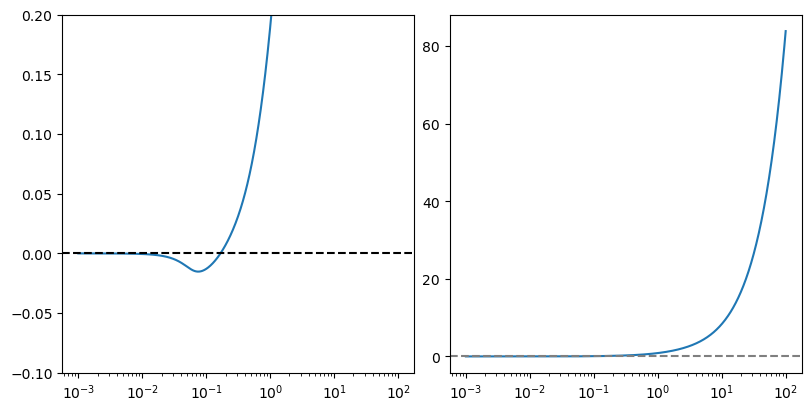

In [9]:
class DMatrix:
    def __init__(self, etaAA, etaAB, etaBA, etaBB, phiA, phiB, Dr, bar_rho_A=1., bar_rho_B=1., bar_vA=1., bar_vB=1., kappa=0.7):
        vA_0, vB_0, omegaAA, omegaAB, omegaBA, omegaBB = get_v0_omega(etaAA, etaAB, etaBA, etaBB, phiA, phiB, bar_rho_A, bar_rho_B, bar_vA, bar_vB, kappa)
        self.vA_0 = vA_0
        self.vB_0 = vB_0
        self.omega = np.array([[omegaAA, omegaAB],
                               [omegaBA, omegaBB]])
        print(self.omega)
        self.Dr = Dr
    
    def get_Mq(self, qx, qy):
        M = get_M(qx, qy, self.omega, self.vA_0, self.vB_0, self.Dr)
        return M

    def get_lambda(self, qx, qy):
        T, Z = schur(self.get_Mq(qx, qy), output="complex")
        eigen_values = np.diagonal(T)
        return eigen_values
    
    def get_lambda_q1D(self, qx_arr, qy_arr):
        lambda_arr = np.array([self.get_lambda(qx_arr[i], qy_arr[i]) for i in range(qx_arr.size)])
        return lambda_arr
    
    

etaAA = etaBB = 0
# etaAB = 4
# etaBA = -etaAB
Dr=0.1
phiA = 1
phiB = 1

qmax = 10**2
q_arr = np.logspace(-3, np.log10(qmax), 1000)
theta = 0.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
for etaAB in [1]:
    etaBA = -etaAB
    M = DMatrix(etaAA, etaAB, etaBA, etaBB, phiA, phiB, Dr)
    qx_arr = q_arr * np.cos(theta)
    qy_arr = q_arr * np.sin(theta)
    lambda_arr = M.get_lambda_q1D(qx_arr, qy_arr)
    max_lambda = lambda_arr.max(axis=1)
    ax1.plot(q_arr, max_lambda.real)
    ax2.plot(q_arr, np.abs(max_lambda).real)
ax1.set_xscale("log")
ax2.set_xscale("log")
ax1.axhline(0, linestyle="dashed", c="k")
ax1.set_ylim(-0.1, 0.2)
plt.axhline(0, c="tab:grey", linestyle="dashed")

plt.show()
plt.close()


In [10]:
from scipy.linalg import eig

etaAA = etaBB = 0
etaAB = 1
etaBA = -etaAB
Dr=0.1
phiA = 1
phiB = 1

M0 = DMatrix(etaAA, etaAB, etaBA, etaBB, phiA, phiB, Dr)

M = M0.get_Mq(0, 2)

T, Z = schur(M, output="complex")
w, vr = eig(T)
print(w.real)
print(vr)






[[ 0.  1.]
 [-1.  0.]]
[ 0.43425662 -0.80194015  0.43425662 -0.80194015 -1.24342758 -1.24342758
 -0.80555556 -0.80555556 -0.80555556 -0.80555556]
[[ 1.00000000e+00+0.00000000e+00j  4.49986618e-16+2.03520599e-16j
   1.55390706e-16+7.49427755e-17j -7.38919142e-02-5.63810163e-02j
  -3.93307466e-01+1.50953097e-01j  1.31510601e-16+2.28512452e-16j
   1.51330154e-16+1.05853392e-16j  1.30500244e-16+3.27546064e-17j
  -1.09814316e-17-5.47150860e-18j -4.09334131e-18+1.08884198e-17j]
 [ 0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  -8.22395534e-02-4.33069261e-02j  1.64446255e-16-2.92701832e-16j
   2.42994162e-16-5.63455955e-16j  6.60057462e-02+2.15534883e-01j
   5.52041408e-17-8.80186033e-17j -3.60247071e-17-4.71507727e-17j
  -2.76426905e-18+6.32476456e-18j  4.40342305e-18-2.63202817e-18j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   9.95671214e-01+0.00000000e+00j -1.11925019e-16+1.13107871e-16j
  -3.61402857e-16+1.48663997e-16j  4.25793153e-01+1.15582835